Overview of the Dataframe

In [38]:
import pandas
from datetime import datetime
from pytz import utc  #pytz es una biblioteca para trabajar con fechas y horas en Python y utc es la zona horaria universal
data = pandas.read_csv("reviews.csv", parse_dates= ["Timestamp"])  #Parse_dates es para que pandas reconozca la fecha en la columna

In [39]:
data.head()  #Head se usa para ver los primeros 5 registros de la tabla

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [40]:
data.shape  #shape nos da la cantidad de filas y columnas

(45000, 4)

In [41]:
data.columns  #Nos muestra el nombre de las columnas 

Index(['Course Name', 'Timestamp', 'Rating', 'Comment'], dtype='object')

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

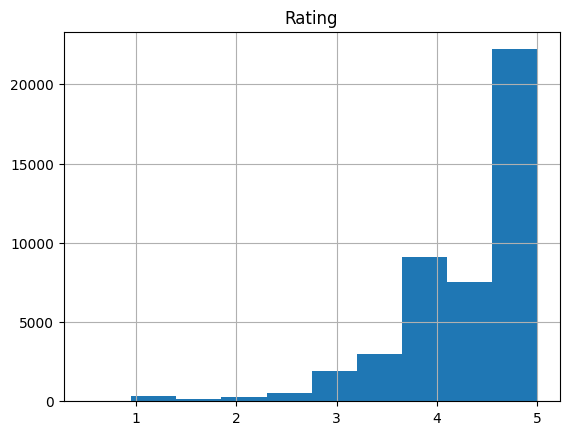

In [42]:
data.hist("Rating")  #Nos crea un histograma de la columna "Rating"
#No es el mejor grafico, pero nos permite tener una vision clara de la distribucion de los ratings

Selecting data from the dataframe

Select a colum

In [43]:
print(f"The mean of the Rating column is: {round(data["Rating"].mean(), 2)}")

The mean of the Rating column is: 4.44


Select multiple columns

In [44]:
data[["Course Name", "Rating"]]  #Para seleccionar multiples columnas tenemos que pasar en una lista el nombre de las columnas que queremos ver

,Course Name,Rating
0,The Python Mega Course: Build 10 Real World Ap...,4.0
1,The Python Mega Course: Build 10 Real World Ap...,4.0
2,The Python Mega Course: Build 10 Real World Ap...,4.0
3,The Python Mega Course: Build 10 Real World Ap...,5.0
4,The Python Mega Course: Build 10 Real World Ap...,4.5
...,...,...
44995,Python for Beginners with Examples,4.0
44996,The Python Mega Course: Build 10 Real World Ap...,5.0
44997,The Python Mega Course: Build 10 Real World Ap...,5.0
44998,Python for Beginners with Examples,5.0


Selecting a row

In [45]:
data.iloc[3]  
#Aqui podemos guiarnos por el índice de la fila que queremos acceder en este caso la 3 es la 3, no tenemos que contar desde cero 
#La forma para acceder a las filas es con iloc["Posición de la fila"]

Course Name    The Python Mega Course: Build 10 Real World Ap...
Timestamp                              2021-04-02 03:33:24+00:00
Rating                                                       5.0
Comment                                                      NaN
Name: 3, dtype: object

Selecting multiple rows

In [46]:
data.iloc[0: 3]  #Para multiples filas seleccionamos el rango, en este caso 0:3 

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN


Selecting a section

In [47]:
data[["Course Name", "Rating"]].iloc[1 : 3]  
#Aqui prácticamente combinamos los codigos para obtener los datos de las columas, seguido por el codigo para obtener los datos de las filas

,Course Name,Rating
1,The Python Mega Course: Build 10 Real World Ap...,4.0
2,The Python Mega Course: Build 10 Real World Ap...,4.0


Selecting a cell

In [48]:
data["Timestamp"].iloc[2]  #Siempre hay que guiarnos por el indice 

Timestamp('2021-04-02 05:11:03+0000', tz='UTC')

Otra forma de hacerlo es con el método at
Este método es recomendable para seleccionar una sola celda

In [49]:
data.at[2, "Timestamp"]  #Con at pasamos primero la fila y luego la columna

Timestamp('2021-04-02 05:11:03+0000', tz='UTC')

Filtering data based on conditions

One condition

In [50]:
data[data["Rating"] >= 4]  
#Tenemos que pasar el dataframe completo, luego filtrar por la columna "Rating" y finalmente seleccionar solo las filas donde el valor sea mayor a 4

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN
...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN


In [51]:
len(data[data["Rating"] >= 4] )  #Aqui podemos saber cuantos cursos tienen una calificación igual o superior a 4

38873

In [52]:
#Otra forma de hacerlo es con el método count
data[data["Rating"] >= 4].count()
#Pero con count nos muestra la cantidad de valores de cada columna que cumplen la condición de que Rating sea mayor o igual a 4

Course Name    38873
Timestamp      38873
Rating         38873
Comment         5911
dtype: int64

Almacenamos la condición y mostramos solo la columa para obtener la media

In [53]:
d2 = data[data["Rating"] > 4]
round(d2["Rating"].mean(), 2)

4.87

Multiple conditions

In [54]:
data["Course Name"].unique()  #unique se usa para obtener valores únicos de una columna

array(['The Python Mega Course: Build 10 Real World Applications',
       'The Complete Python Course: Build 10 Professional OOP Apps',
       '100 Python Exercises I: Evaluate and Improve Your Skills',
       'Interactive Data Visualization with Python and Bokeh',
       'Python for Beginners with Examples',
       'Data Processing with Python',
       '100 Python Exercises II: Evaluate and Improve Your Skills',
       'Learn GIS in One Hour'], dtype=object)

In [55]:
round(data[(data["Rating"] > 4) & (data["Course Name"] == "The Complete Python Course: Build 10 Professional OOP Apps")]["Rating"].mean(), 2)
#Aqui pasamos dos condiciones , la primera es que la nota sea mayor a 4 y la segunda es que el curso sea "The Complete Python Course: Build 10 Professional OOP Apps"
#Luego seleccionamos la columna "Rating" y calculamos el promedio, esto nos indica cual es el promedio de calificación de este curso especifico 

4.91

TIme based Filtering

In [56]:
data[(data["Timestamp"] >= datetime(2020, 7, 1, tzinfo= utc)) & (data["Timestamp"] <= datetime(2020, 12, 31, tzinfo= utc))]
#Aqui fitramos los datos que estén entre el 1 de julio y el 31 de diciembre de 2020
#A esto debemos agregar tzinfo= utc para que se reconozca la zona horaria 

,Course Name,Timestamp,Rating,Comment
3065,Interactive Data Visualization with Python and...,2020-12-30 23:28:34+00:00,3.0,NaN
3066,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 22:59:02+00:00,4.0,NaN
3067,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 22:40:10+00:00,4.5,NaN
3068,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 21:56:41+00:00,4.5,NaN
3069,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 21:14:34+00:00,4.5,NaN
...,...,...,...,...
9729,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 03:09:44+00:00,3.5,NaN
9730,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 03:09:12+00:00,5.0,NaN
9731,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 02:40:58+00:00,4.0,NaN
9732,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 02:04:02+00:00,5.0,nice


Exercise From data to information

Average rating

In [57]:
round(data["Rating"].mean(), 2)

4.44

Average Rating for a particular course

In [58]:
round(data[data["Course Name"] == "The Python Mega Course: Build 10 Real World Applications"]["Rating"].mean(), 2)

4.48

Average rating for a particular period

In [59]:
round(data[(data["Timestamp"] >= datetime(2020, 1, 1, tzinfo= utc)) &
(data["Timestamp"] <= datetime(2020, 12, 31, tzinfo= utc))]["Rating"].mean(), 2)

4.48

Average rating for a particular period for a particular course

In [60]:
round(data[(data["Timestamp"] >= datetime(2020, 1, 1, tzinfo= utc)) &
(data["Timestamp"] <= datetime(2020, 12, 31, tzinfo= utc)) &
(data["Course Name"] == "The Python Mega Course: Build 10 Real World Applications")]["Rating"].mean(), 2)

4.51

Average of uncomented ratings

In [75]:
round(data[data["Comment"].isnull()]["Rating"].mean(), 2)  #isnull se usa para saber cuantos valores de la columna "Comment" son nulos

4.43

In [76]:
round(data[data["Comment"].notnull()]["Rating"].mean(), 2)

4.49

In [77]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN
